<a href="https://colab.research.google.com/github/tcelia/Code-Templates/blob/main/Visualizationsipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium

In [2]:
dataset = pd.read_csv('Data.csv')

In [3]:
#get generic info
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
None


# Let's create a scatter plot for each X and corresponding Y values

In [4]:
yname=dataset.columns[-1]
xnames=dataset.columns[0:len(dataset.columns)-1]
allcols=dataset.columns

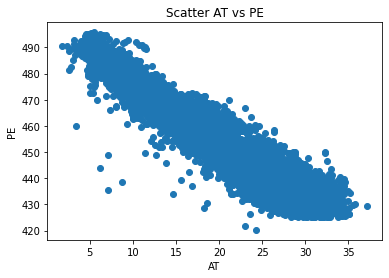

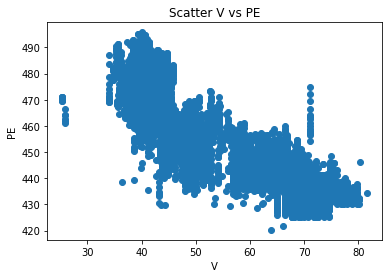

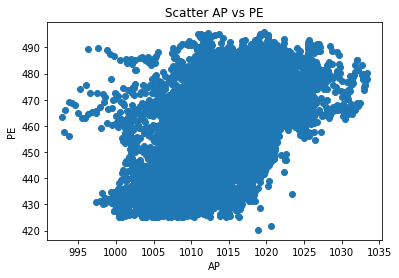

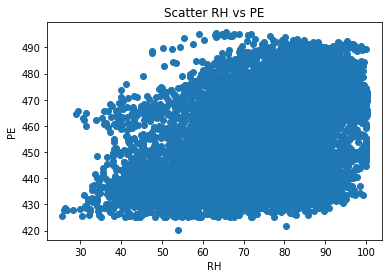

In [5]:
for cols in xnames:
  plt.scatter(dataset[cols], dataset[yname])
  plt.title('Scatter ' + cols + " vs " +yname)
  plt.xlabel(cols)
  plt.ylabel(yname)
  plt.show()

#Let's create a histogram of each column

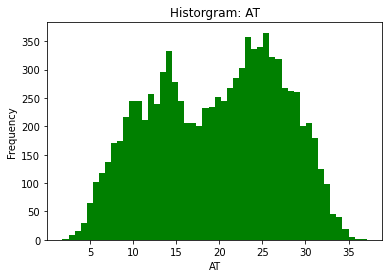

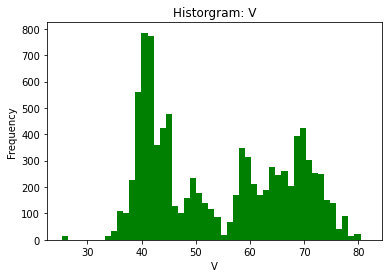

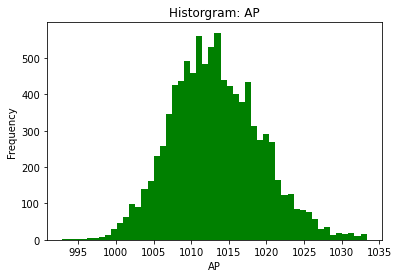

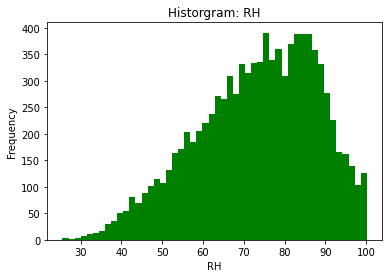

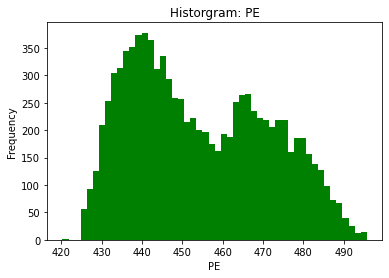

In [6]:
#histograms of each column
for cols in allcols:
  plt.hist(dataset[cols], 50, color='green')
  plt.title('Historgram: ' +cols)
  plt.xlabel(cols)
  plt.ylabel('Frequency')
  plt.show()

#Now we will create a map of the US with the ABS loan level data

In [7]:
#import data
dataset1 = pd.read_csv('exh1025940012019.csv')

In [8]:
#create new data frame, grouping by obligorgeographic location, counting # of states and summing loan balance
mapdata=pd.DataFrame(dataset1.groupby('obligorGeographicLocation').aggregate({'obligorGeographicLocation':np.count_nonzero,'reportingPeriodActualEndBalanceAmount':np.sum}))
#rename the columns so we can turn the index (which is the states) to a new column
mapdata.rename(columns={'obligorGeographicLocation':'Count','reportingPeriodActualEndBalanceAmount':'Loan Balance'}, inplace=True)
#move the index to a column
mapdata.reset_index(inplace=True)
#add in a column for % of grand total
mapdata['Percent']=mapdata['Loan Balance']/mapdata['Loan Balance'].sum()
for x in mapdata.columns:
  if mapdata[x].dtype != 'object':
    print("sum of " + x + ": " + str(mapdata[x].sum()))
len(mapdata)

sum of Count: 62813
sum of Loan Balance: 1297469193.6199994
sum of Percent: 0.9999999999999998


54

In [9]:
mapdata.head()

,obligorGeographicLocation,Count,Loan Balance,Percent
0,AE,2,11079.93,0.000009
1,AK,174,3806579.05,0.002934
2,AL,764,16126329.30,0.012429
3,AP,2,12239.54,0.000009
4,AR,613,13949497.72,0.010751


In [10]:
#for ease of this analysis, I created a spreadsheet with the states, abbreviations, lat/long. This code could be used for part
#us_state_abbrev = {'AL':'Alabama','AK':'Alaska','AS':'American Samoa','AZ':'Arizona','AR':'Arkansas',
#    'CA':'California','CO':'Colorado','CT':'Connecticut','DE':'Delaware','DC':'District of Columbia',
#    'FL':'Florida','GA':'Georgia','GU':'Guam','HI':'Hawaii','ID':'Idaho','IL':'Illinois','IN':'Indiana',
#    'IA':'Iowa','KS':'Kansas','KY':'Kentucky','LA':'Louisiana','ME':'Maine','MD':'Maryland','MA':'Massachusetts',
#    'MI':'Michigan','MN':'Minnesota','MS':'Mississippi','MO':'Missouri','MT':'Montana','NE':'Nebraska','NV':'Nevada',
#    'NH':'New Hampshire','NJ':'New Jersey','NM':'New Mexico','NY':'New York','NC':'North Carolina','ND':'North Dakota',
#    'MP':'Northern Mariana Islands','OH':'Ohio','OK':'Oklahoma','OR':'Oregon','PA':'Pennsylvania','PR':'Puerto Rico',
#    'RI':'Rhode Island','SC':'South Carolina','SD':'South Dakota','TN':'Tennessee','TX':'Texas','UT':'Utah','VT':'Vermont',
#    'VI':'Virgin Islands','VA':'Virginia','WA':'Washington (state)','WV':'West Virginia','WI':'Wisconsin','WY':'Wyoming'}

In [11]:
##Update the map data with the full state name
#mapdata['obligorGeographicLocation'].replace(us_state_abbrev, inplace=True)
##we are going to drop AE and AP (armed forces Europe and armed forces Pacific). Write some code to display the actual amounts dropped!
#mapdata=mapdata[(mapdata.obligorGeographicLocation != "AE") & (mapdata.obligorGeographicLocation != "AP")]
#print(len(mapdata))

In [12]:

#for ease of this analysis, I created a spreadsheet with the states, abbreviations, lat/long. This code could be used for part
#from geopy.exc import GeocoderTimedOut
#from geopy.geocoders import Nominatim

## declare an empty list to store latitude and longitude of values of state column
#longitude = []
#latitude = []
   
# function to find the coordinate of a given state 
#def findGeocode(state):
       
    # try and catch is used to overcome the exception thrown by geolocator using geocodertimedout  
#    try:
          
        # Specify the user_agent as your app name it should not be none
#        geolocator = Nominatim(user_agent="your_app_name")
          
#        return geolocator.geocode(state)
      
#    except GeocoderTimedOut:
          
#        return findGeocode(state)    
  
## each value from state column will be fetched and sent to function find_geocode   
#for i in (mapdata["obligorGeographicLocation"]):
      
#    if findGeocode(i) != None:
           
#        loc = findGeocode(i)
          
#        # coordinates returned from function is stored into two separate list
#        latitude.append(loc.latitude)
#        longitude.append(loc.longitude)
       
#    # if coordinate for a state not found, insert "NaN" indicating missing value 
#    else:
#        latitude.append(np.nan)
#        longitude.append(np.nan)
#mapdata['Longitude']=longitude
#mapdata['Latitude']=latitude

In [13]:
#import data file
stateabbrev = pd.read_csv('States.csv')
stateabbrev.head()

,State,Abbreviation,Longitude,Latitude
0,Alaska,AK,-149.680909,64.445961
1,Alabama,AL,-86.829534,33.258882
2,Arkansas,AR,-92.447911,35.204888
3,Arizona,AZ,-111.763275,34.395342
4,California,CA,-118.755997,36.701463


In [14]:
mapdata=pd.merge(mapdata,stateabbrev, left_on='obligorGeographicLocation', right_on='Abbreviation', how='left')
#we are going to drop AE and AP (armed forces Europe and armed forces Pacific). Write some code to display the actual amounts dropped!
mapdata=mapdata[(mapdata.obligorGeographicLocation != "AE") & (mapdata.obligorGeographicLocation != "AP")]

In [15]:
lat=37.0902
long= -95.7129
us_map = folium.Map(location=[lat, long], zoom_start=4, tiles='Stamen Toner')

In [16]:
# loop through the states and add each name and % to the map
for lat, lng, state, percent in zip(mapdata.Latitude, mapdata.Longitude, mapdata.obligorGeographicLocation, mapdata.Percent	):
    folium.CircleMarker(
        [lat, lng],
        radius=7, # define how big you want the circle markers to be
        color='green',
        fill=True,
        popup=state +" {:.1%}".format(percent),
        fill_color='red',
        fill_opacity=0.6
    ).add_to(us_map)

# show map
us_map

#Let's add a map with Marker Clusters

In [17]:
from folium import plugins

lat=37.0902
long= -95.7129
us_map1 = folium.Map(location=[lat, long], zoom_start=4,tiles='Stamen Terrain')

groups = plugins.MarkerCluster().add_to(us_map1)

# loop through the states and add each name and % to the map
for lat, lng, state, percent in zip(mapdata.Latitude, mapdata.Longitude, mapdata.obligorGeographicLocation, mapdata.Percent	):
    folium.CircleMarker(
        [lat, lng],
        radius=7, # define how big you want the circle markers to be
        color='green',
        fill=True,
        popup=state +" {:.1%}".format(percent),
        fill_color='red',
        fill_opacity=0.6
    ).add_to(groups)

# show map
us_map1

#Finally, we will create a Choropleth Map

In [18]:
import json
# download US geo json file
#!wget --quiet https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json
us_geo = r'us-states.json' # geojson file

In [19]:
#drop non-states
mapdata=mapdata[(mapdata.obligorGeographicLocation != "DC") & (mapdata.obligorGeographicLocation != "GU")]

In [20]:
us_map = folium.Map(location=[lat, long], zoom_start=4)
us_map.choropleth(
    geo_data=us_geo,
    data=mapdata,
    columns=['State', 'Percent'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Loan Balance'
)
for lat, lng, state, percent in zip(mapdata.Latitude, mapdata.Longitude, mapdata.obligorGeographicLocation, mapdata.Percent	):
    folium.CircleMarker(
        [lat, lng],
        radius=7, # define how big you want the circle markers to be
        color='green',
        fill=True,
        popup=state +" {:.1%}".format(percent),
        fill_color='red',
        fill_opacity=0.6
    ).add_to(us_map)
# display map
us_map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [21]:
us_map = folium.Map(location=[lat, long], zoom_start=4, tiles='Stamen Toner')
us_map.choropleth(
    geo_data=us_geo,
    data=mapdata,
    columns=['State', 'Percent'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Loan Balance'
)
for lat, lng, state, percent in zip(mapdata.Latitude, mapdata.Longitude, mapdata.obligorGeographicLocation, mapdata.Percent	):
    folium.CircleMarker(
        [lat, lng],
        radius=7, # define how big you want the circle markers to be
        color='green',
        fill=True,
        popup=state +" {:.1%}".format(percent),
        fill_color='red',
        fill_opacity=0.6
    ).add_to(us_map)
# display map
us_map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [22]:
#update/install plotly if necessary
#pip install -U plotly

In [23]:
mapdata.head(2)

,obligorGeographicLocation,Count,Loan Balance,Percent,State,Abbreviation,Longitude,Latitude
1,AK,174,3806579.05,0.002934,Alaska,AK,-149.680909,64.445961
2,AL,764,16126329.30,0.012429,Alabama,AL,-86.829534,33.258882


In [24]:
import plotly.express as px
import json
f=open('us-states.json')
json1=json.load(f)
fig=px.choropleth_mapbox(mapdata, geojson=json1, locations='State', featureidkey="properties.name", color_continuous_scale="sunset",color='Percent', mapbox_style="carto-positron", 
                         zoom=3, center={"lat": lat, "lon":long}, hover_data={'Percent':':.1%'})

fig.show()